In [1]:
%load_ext autoreload
%autoreload 2

import cv2
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import glob
import h5py

import sys
sys.path.append('../../src')
from utils import smooth_curve
from Viz import show_images
from PlumeDataset import plume_dataset
from AutoAlign import align_plumes
from Velocity import VelocityCalculator
from PlumeMetrics import PlumeMetrics

In [2]:
ds_files_dict = {}
ds_files = glob.glob('../../datasets/YG*h5')
for file in ds_files:
    plume_ds = plume_dataset(file_path=file, group_name='PLD_Plumes')
    ds_files_dict[file] = plume_ds.dataset_names()[0]
ds_files_dict

{'../../datasets\\YG028_Yichen_Guo_06012022.h5': '1-SrRuO3',
 '../../datasets\\YG029_Yichen_Guo_06012022.h5': '1-SrRuO3',
 '../../datasets\\YG030_Yichen_Guo_06012022.h5': '1-SrRuO3',
 '../../datasets\\YG031_Yichen_Guo_06082022.h5': '1-SrRuO3(Berkeley_1C)',
 '../../datasets\\YG032_Yichen_Guo_06112022.h5': '1-SrRuO3(Berkeley_1C)',
 '../../datasets\\YG033_Yichen_Guo_06112022.h5': '1-SrRuO3(Berkeley_1C)',
 '../../datasets\\YG034_Yichen_Guo_06112022.h5': '1-SrRuO3(Berkeley_1C)',
 '../../datasets\\YG035_Yichen_Guo_06152022.h5': '1-SrRuO3(Berkeley_1C)',
 '../../datasets\\YG036_Yichen_Guo_06152022.h5': '1-SrRuO3(Berkeley_1C)',
 '../../datasets\\YG037_Yichen_Guo_06152022.h5': '1-SrRuO3(Berkeley_1C)',
 '../../datasets\\YG038_Yichen_Guo_06152022.h5': '1-SrRuO3(Berkeley_1C)',
 '../../datasets\\YG039_Yichen_Guo_07132022.h5': '1-SrRuO3',
 '../../datasets\\YG040_Yichen_Guo_07132022.h5': '1-SrRuO3',
 '../../datasets\\YG041_Yichen_Guo_07132022.h5': '1-SrRuO3(Berkeley_new)',
 '../../datasets\\YG042_Yich

In [6]:
# plume_ds_YG028 = plume_dataset(file_path='../../datasets/YG028_Yichen_Guo_06012022.h5', group_name='PLD_Plumes')
# print(plume_ds_YG028.dataset_names())
# plumes = plume_ds_YG028.load_plumes('1-SrRuO3')
# show_images(plumes[0][:100], img_per_row=16, img_height=1, title='Example plumes')

### load plumes

In [8]:
labels = list(np.arange(8, 82, 5))
labels

[8, 13, 18, 23, 28, 33, 38, 43, 48, 53, 58, 63, 68, 73, 78]

In [ ]:
ds_files = glob.glob('../../datasets/YG*h5')
labels = list(np.arange(8, 100, 6))
for file, loading_name in ds_files_dict.items():
    ds_name = file.split('\\')[-1].split('_')[0]
    plume_ds = plume_dataset(file_path=file, group_name='PLD_Plumes')
    plumes = plume_ds.load_plumes(loading_name)
    show_images(plumes[3][labels], labels=labels, img_per_row=16, img_height=1, title=ds_name)
    plt.show()

## analyze plumes

In [18]:
def analyze_function(P, V, plumes, threshold, index, viz_index, plume_name, 
                     align_parms={'align':False, 'coords':None, 'coords_standard':None}):
    # plumes = plumes[x_range[0]:x_range[1]]

    # align plumes
    if align_parms['align']:
        if align_parms['coords'] is None or align_parms['coords_standard'] is None:
            raise ValueError('Please provide the coordinates for alignment')
        else:
            plumes = align_plumes(plumes, align_parms['coords'], align_parms['coords_standard'])

    show_images(plumes[index][viz_index], img_per_row=16, img_height=1, title=plume_name)
    plt.show()

    areas, coords, labeled_images = P.calculate_area_for_plumes(plumes, threshold=threshold, return_format='dataframe')
    df_area = P.to_df(areas)

    print(plumes[index][viz_index].shape, areas[index][viz_index].shape, coords[index][viz_index].shape, labeled_images[index][viz_index].shape)
    P.viz_blob_plume(plumes[index][viz_index], areas[index][viz_index], coords[index][viz_index], labeled_images[index][viz_index], title=f'{plume_name}-Area')

    plume_positions, plume_distances, plume_velocities = V.calculate_distance_area_for_plumes(plumes)
    df_velocity = V.to_df(plume_positions, plume_distances, plume_velocities)
    print(plumes[index][viz_index].shape, plume_positions[index][viz_index].shape, plume_distances[index][viz_index].shape, plume_velocities[index][viz_index].shape)
    V.visualize_plume_positions(plumes[index][viz_index], plume_positions[index][viz_index], label_time=False, title=f'{plume_name}-plume position')

    df = pd.concat([df_velocity, df_area], axis=1)
    return df

In [19]:
# analysis frame parameters
start_position = (250//2, 0)
position_range = (0, 360) # x position range
threshold = 20
time_interval = 500e-9  # 500ns

# visualize parameters
index = 3
# x_range = (8, 82) # x_range of frames to visualize
viz_index = list(np.arange(8, 82, 5))

P = PlumeMetrics(time_interval, threshold=threshold)
V = VelocityCalculator(time_interval, position_range, start_position, threshold=threshold)

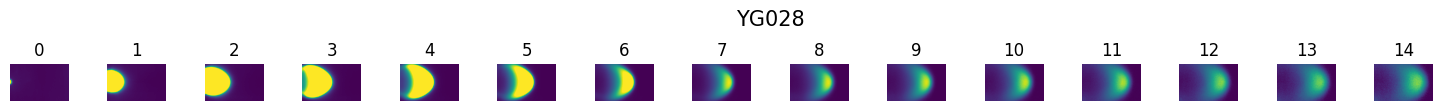

100%|██████████| 55/55 [00:09<00:00,  5.82it/s]


(15, 250, 400) (15,) (15, 2) (15, 250, 400)


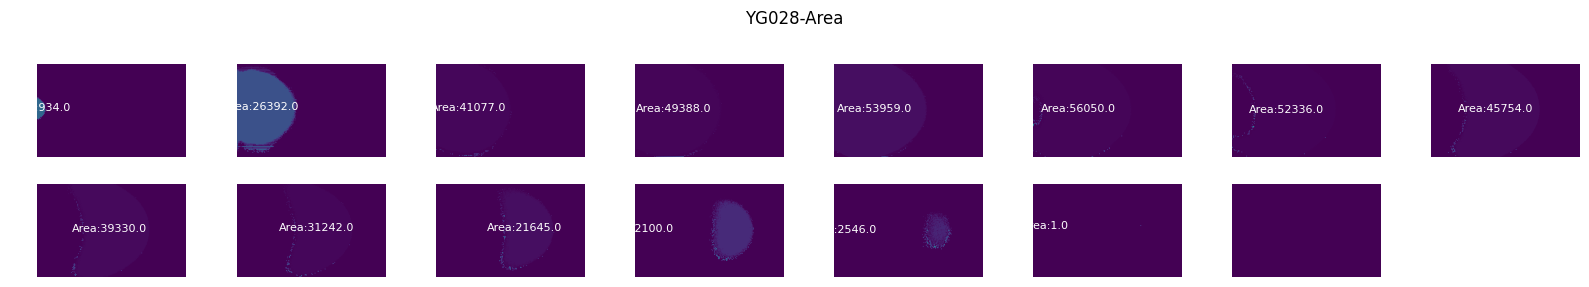

100%|██████████| 55/55 [00:18<00:00,  2.91it/s]


(15, 250, 400) (15, 2) (15,) (15,)


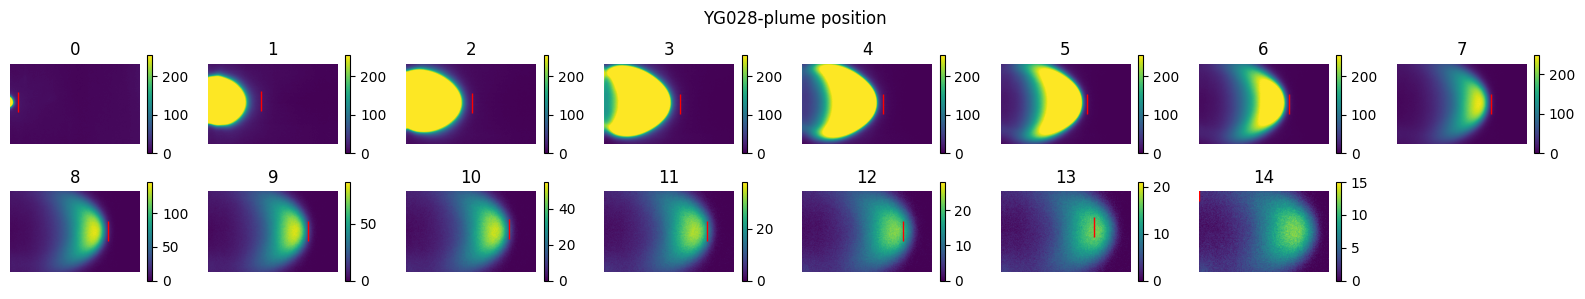

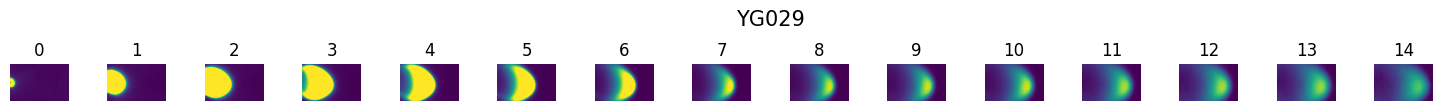

100%|██████████| 55/55 [00:09<00:00,  5.91it/s]


(15, 250, 400) (15,) (15, 2) (15, 250, 400)


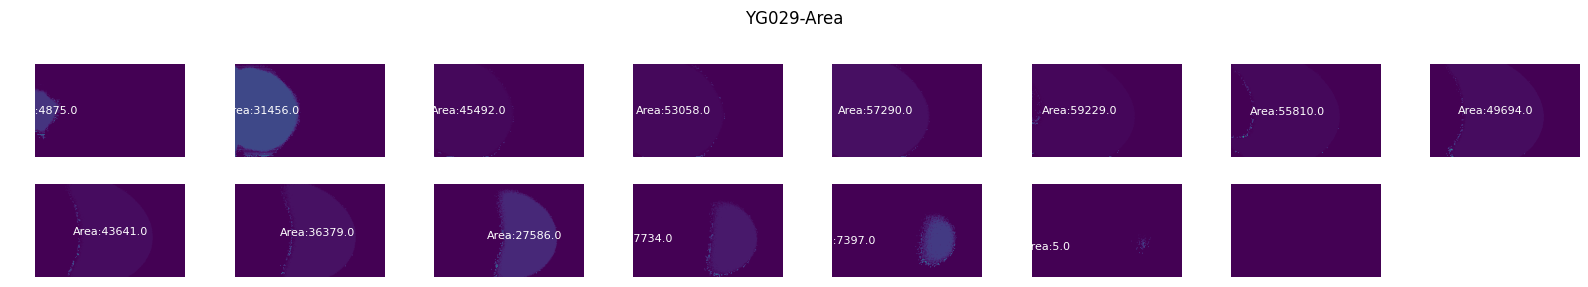

100%|██████████| 55/55 [00:17<00:00,  3.07it/s]


(15, 250, 400) (15, 2) (15,) (15,)


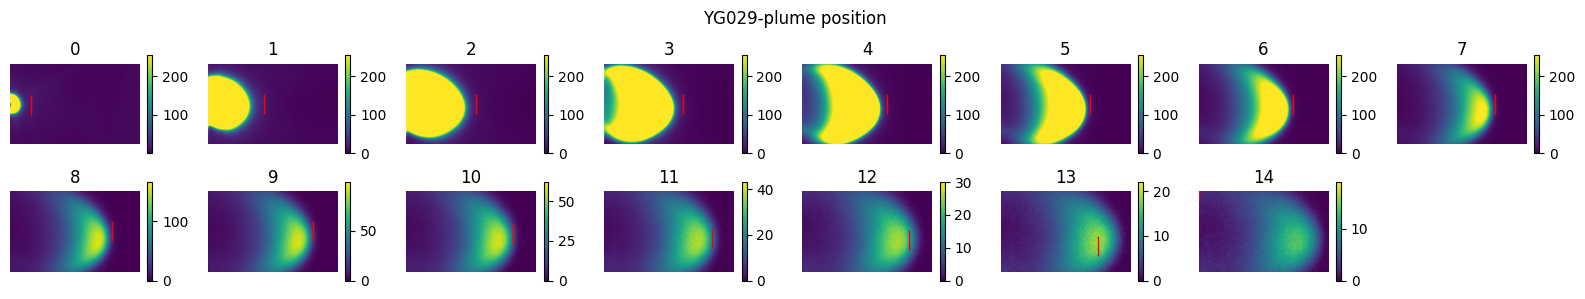

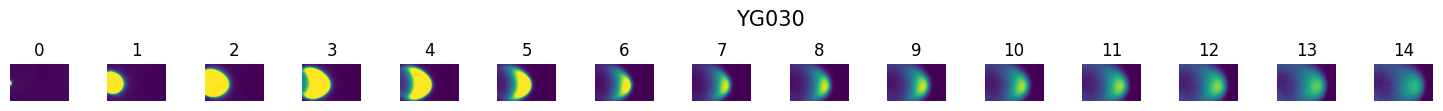

100%|██████████| 55/55 [00:08<00:00,  6.41it/s]


(15, 250, 400) (15,) (15, 2) (15, 250, 400)


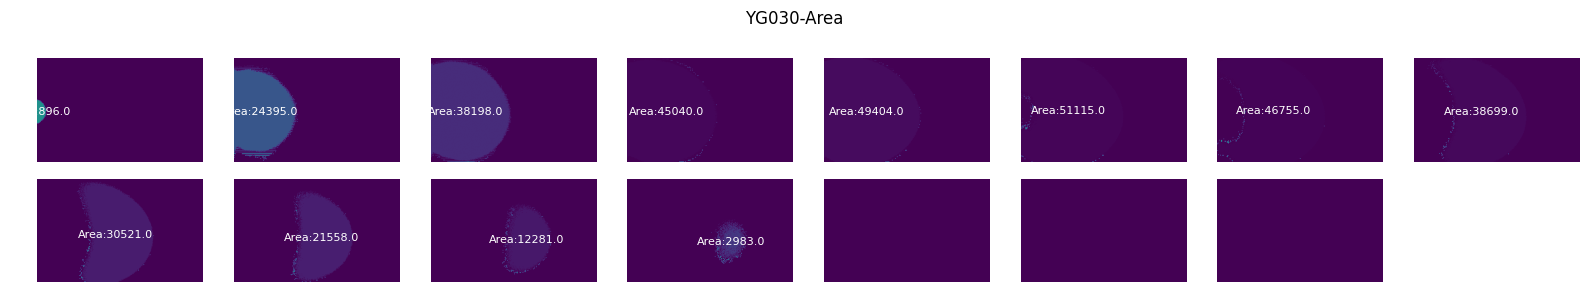

100%|██████████| 55/55 [00:17<00:00,  3.18it/s]


(15, 250, 400) (15, 2) (15,) (15,)


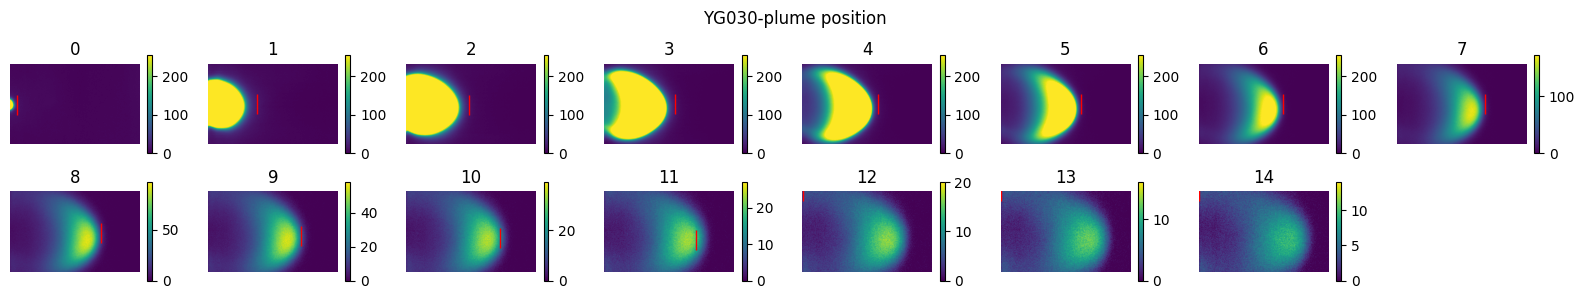

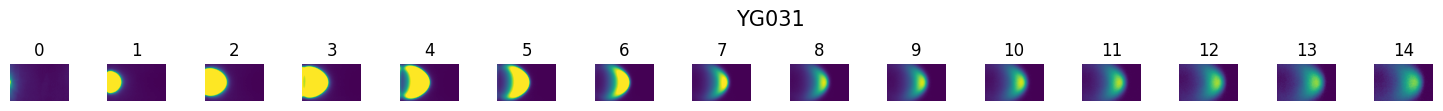

100%|██████████| 46/46 [00:07<00:00,  5.86it/s]


(15, 250, 400) (15,) (15, 2) (15, 250, 400)


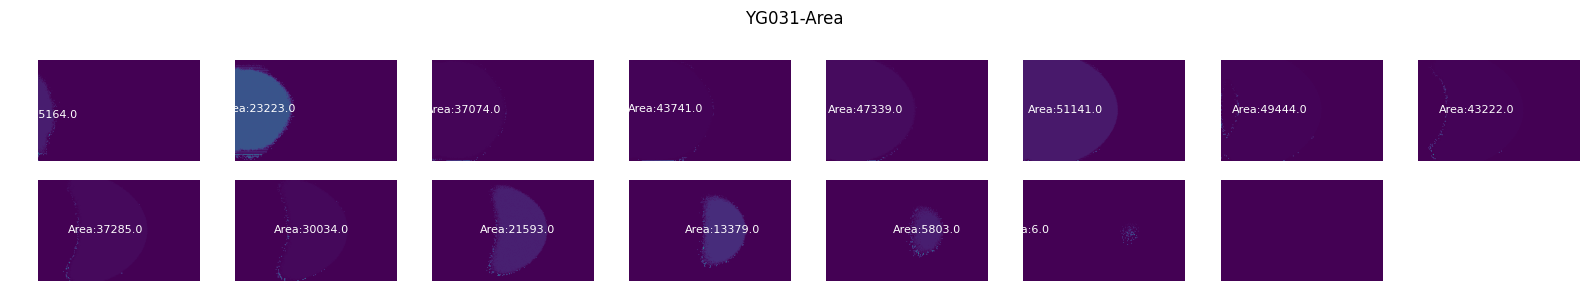

100%|██████████| 46/46 [00:15<00:00,  3.06it/s]


(15, 250, 400) (15, 2) (15,) (15,)


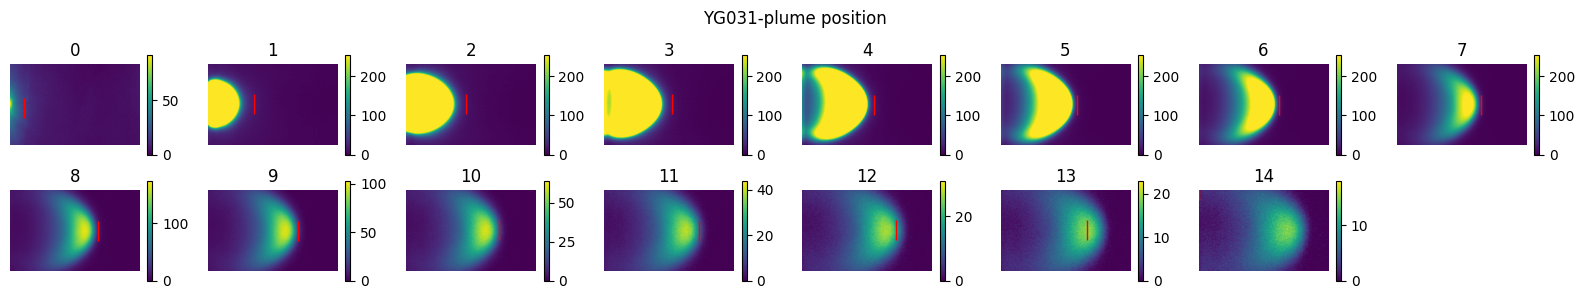

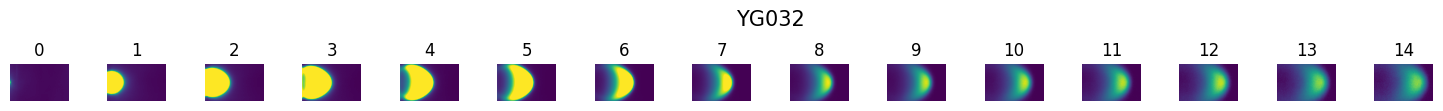

100%|██████████| 40/40 [00:06<00:00,  6.05it/s]


(15, 250, 400) (15,) (15, 2) (15, 250, 400)


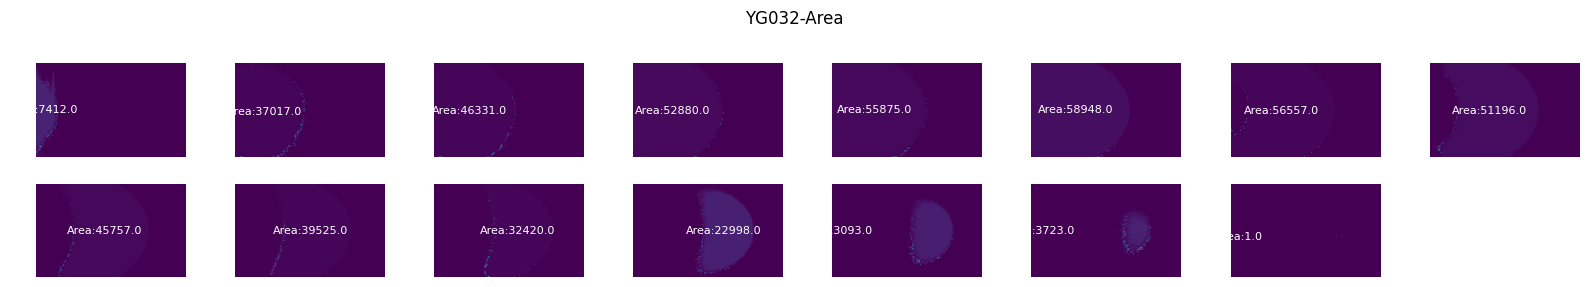

100%|██████████| 40/40 [00:17<00:00,  2.27it/s]


(15, 250, 400) (15, 2) (15,) (15,)


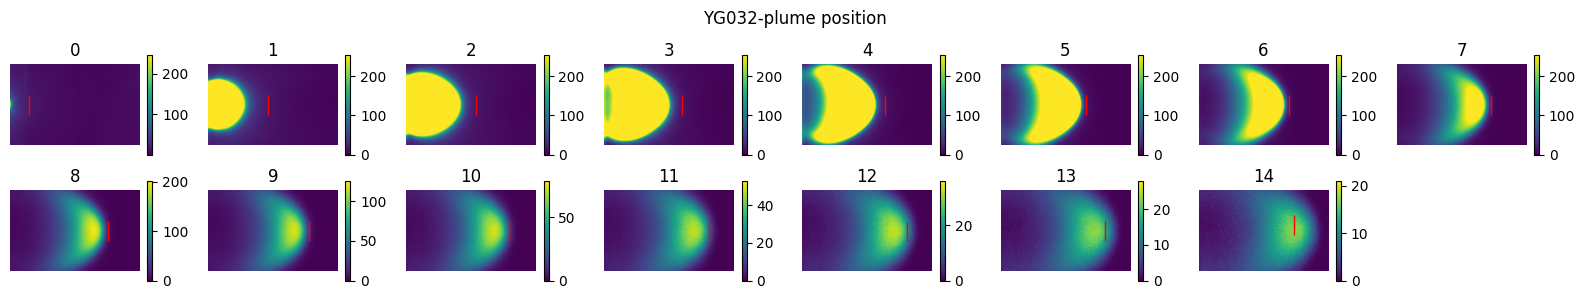

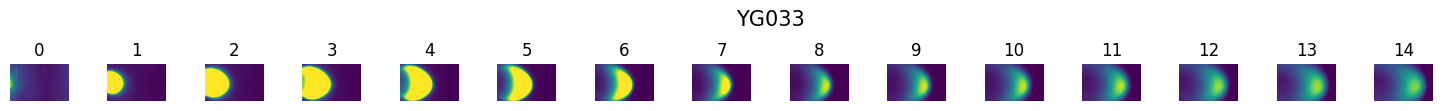

100%|██████████| 40/40 [00:06<00:00,  6.08it/s]


(15, 250, 400) (15,) (15, 2) (15, 250, 400)


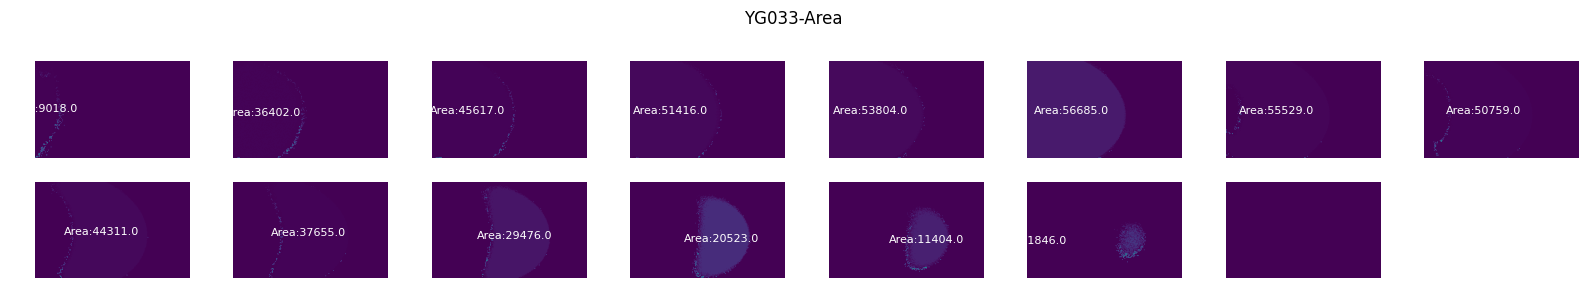

100%|██████████| 40/40 [00:17<00:00,  2.27it/s]


(15, 250, 400) (15, 2) (15,) (15,)


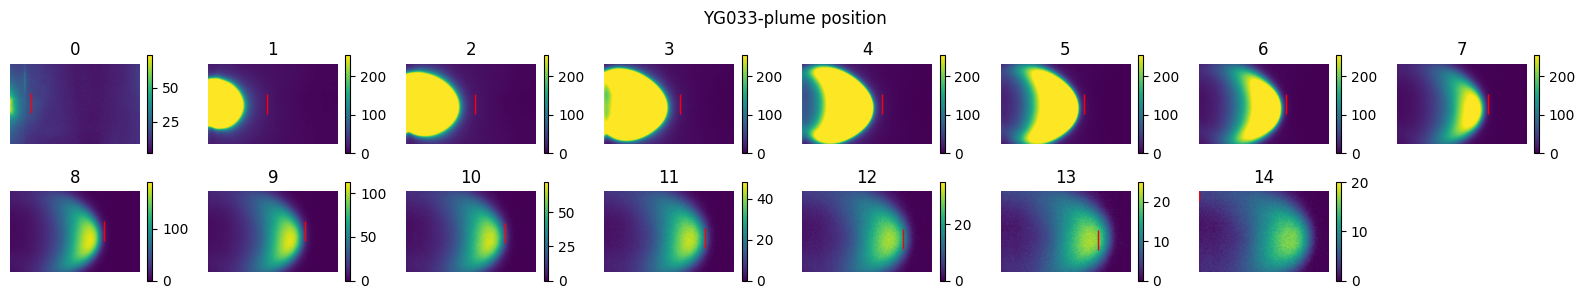

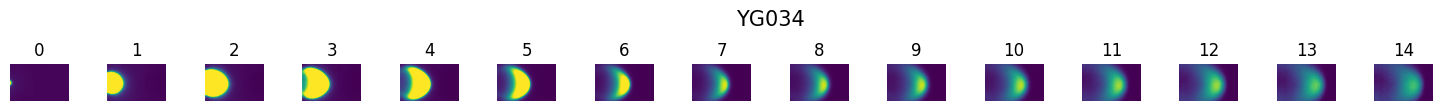

100%|██████████| 39/39 [00:06<00:00,  5.87it/s]


(15, 250, 400) (15,) (15, 2) (15, 250, 400)


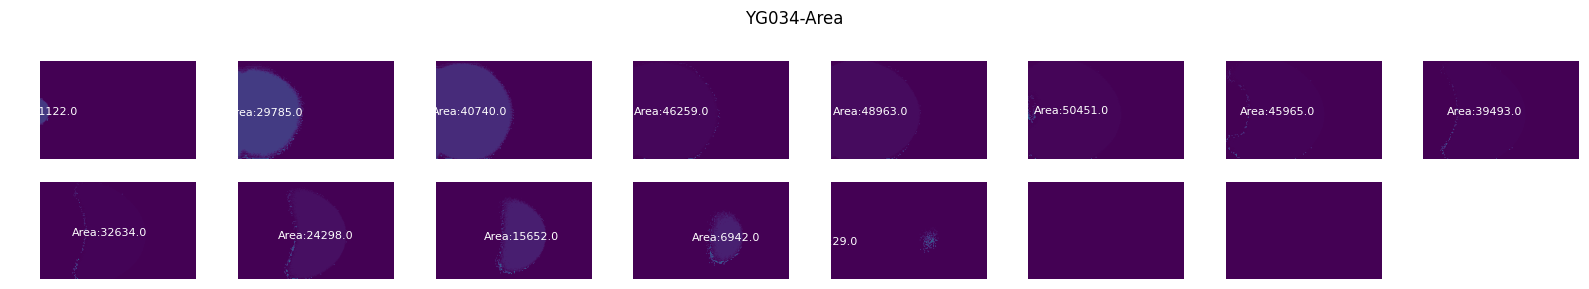

100%|██████████| 39/39 [00:12<00:00,  3.01it/s]


(15, 250, 400) (15, 2) (15,) (15,)


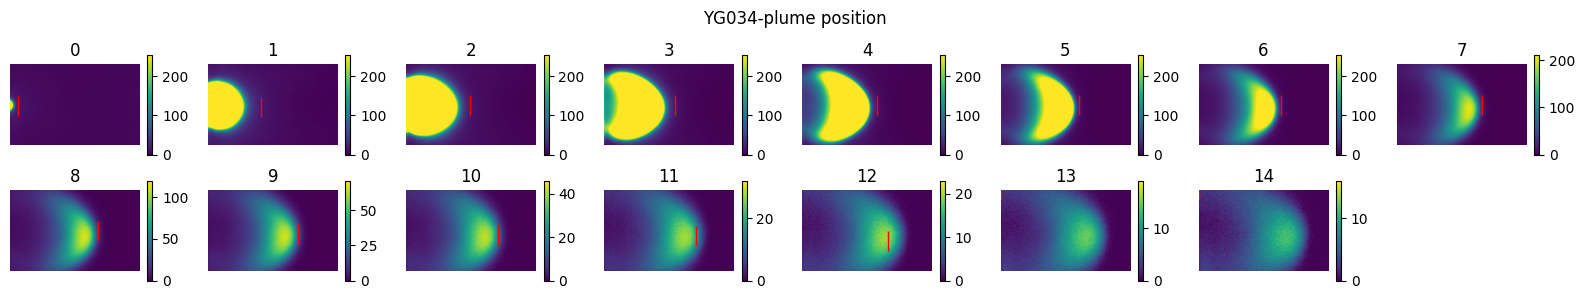

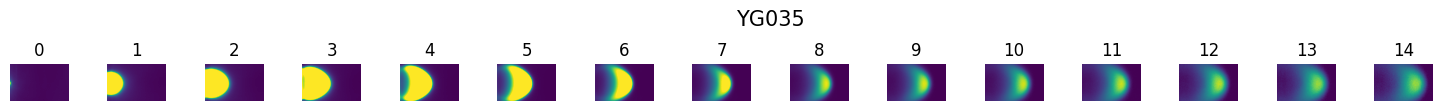

100%|██████████| 55/55 [00:08<00:00,  6.12it/s]


(15, 250, 400) (15,) (15, 2) (15, 250, 400)


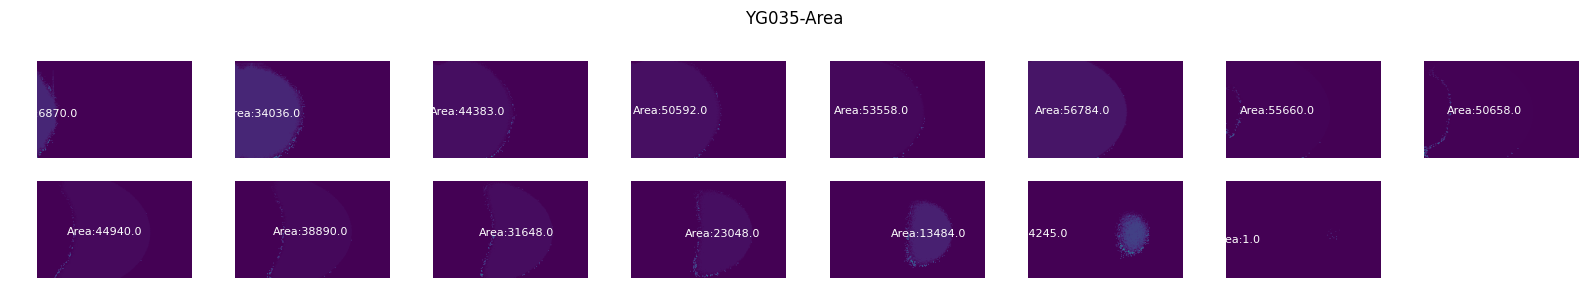

100%|██████████| 55/55 [00:19<00:00,  2.78it/s]


(15, 250, 400) (15, 2) (15,) (15,)


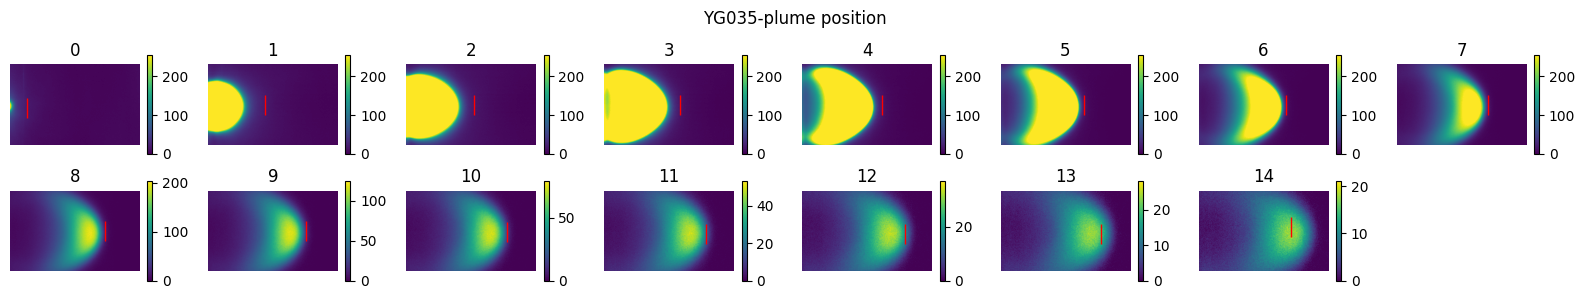

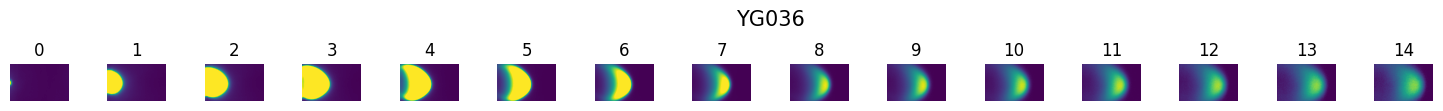

100%|██████████| 55/55 [00:08<00:00,  6.24it/s]


(15, 250, 400) (15,) (15, 2) (15, 250, 400)


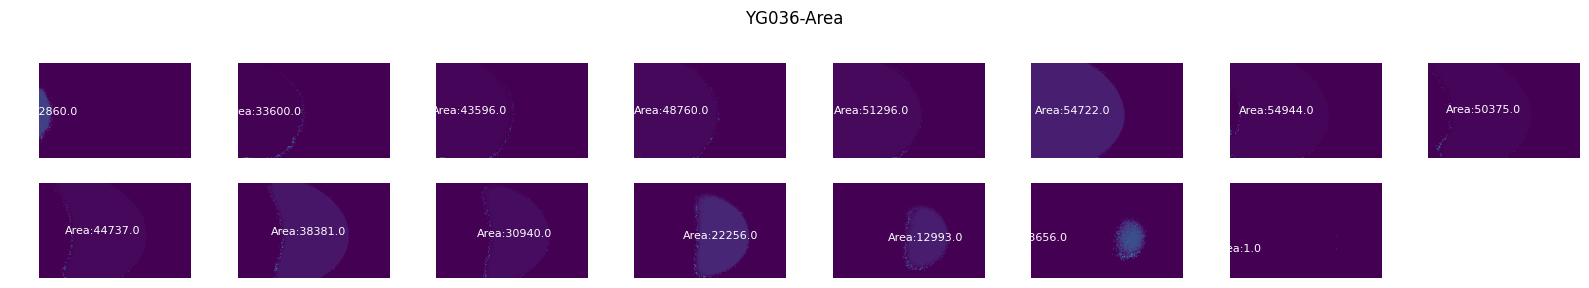

100%|██████████| 55/55 [00:19<00:00,  2.85it/s]


(15, 250, 400) (15, 2) (15,) (15,)


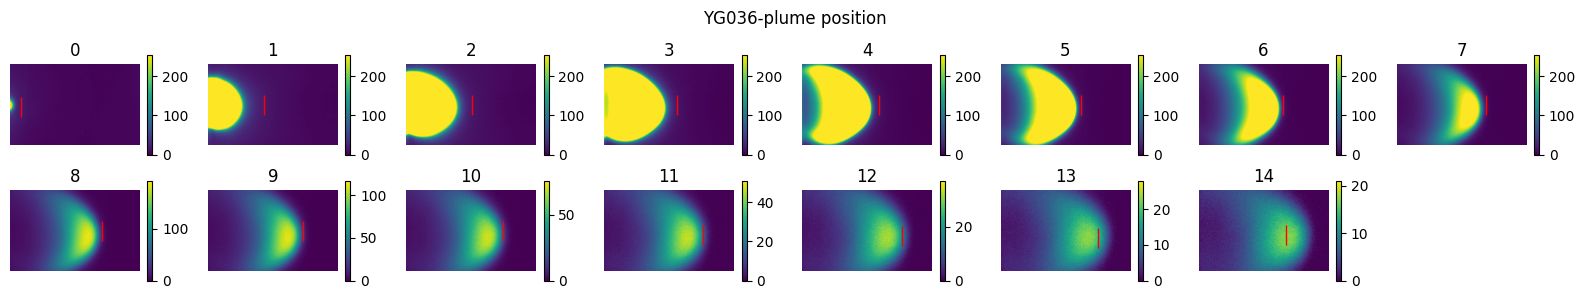

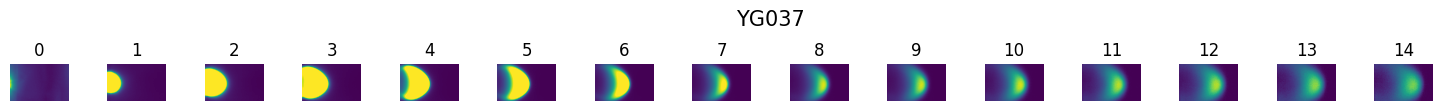

100%|██████████| 55/55 [00:09<00:00,  6.00it/s]


(15, 250, 400) (15,) (15, 2) (15, 250, 400)


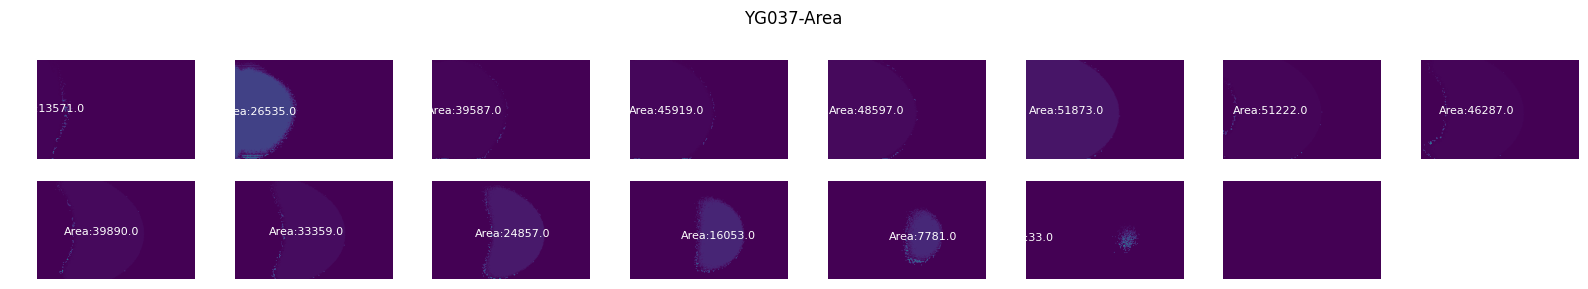

100%|██████████| 55/55 [00:16<00:00,  3.42it/s]


(15, 250, 400) (15, 2) (15,) (15,)


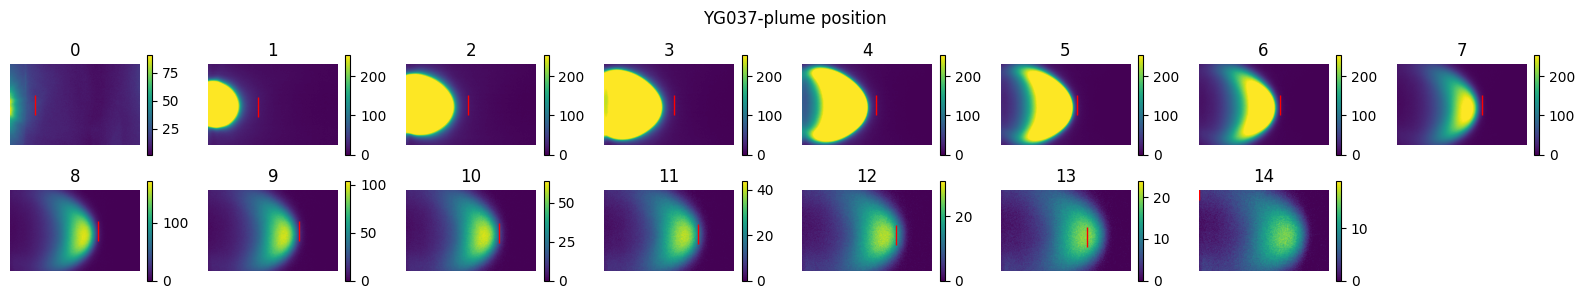

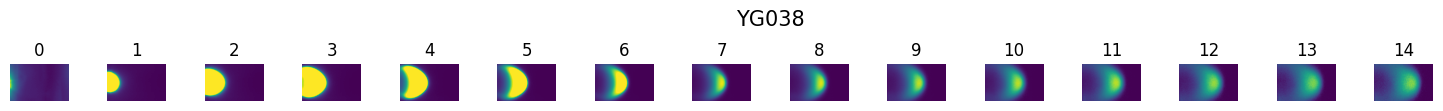

100%|██████████| 55/55 [00:09<00:00,  6.05it/s]


(15, 250, 400) (15,) (15, 2) (15, 250, 400)


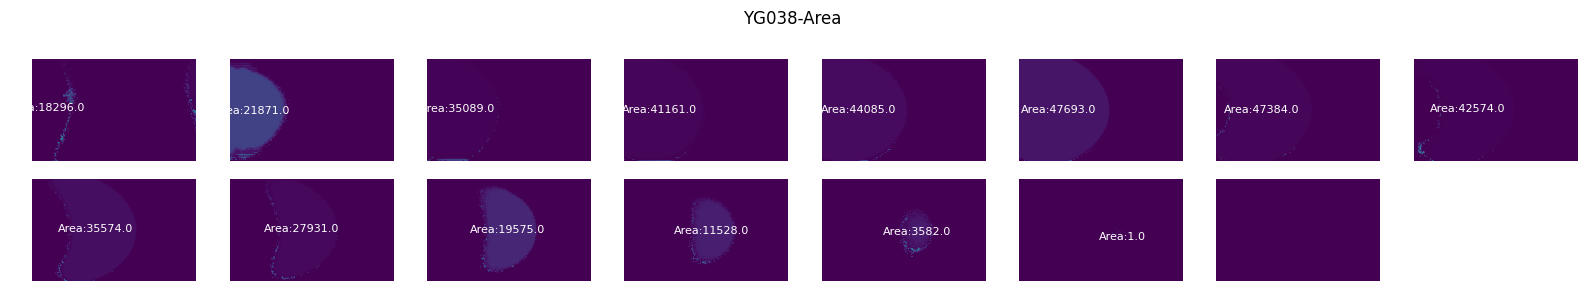

100%|██████████| 55/55 [00:16<00:00,  3.30it/s]


(15, 250, 400) (15, 2) (15,) (15,)


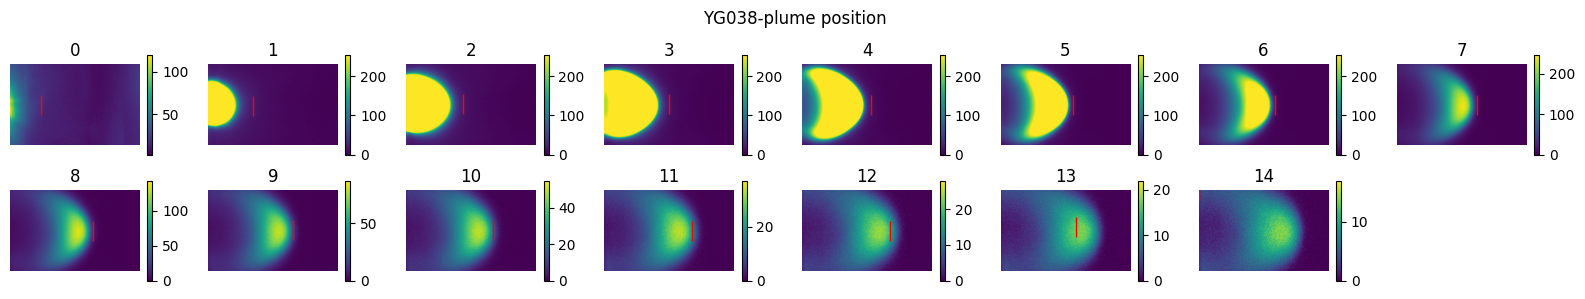

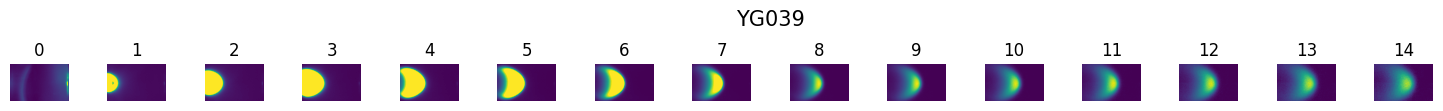

100%|██████████| 41/41 [00:11<00:00,  3.59it/s]


(15, 250, 400) (15,) (15, 2) (15, 250, 400)


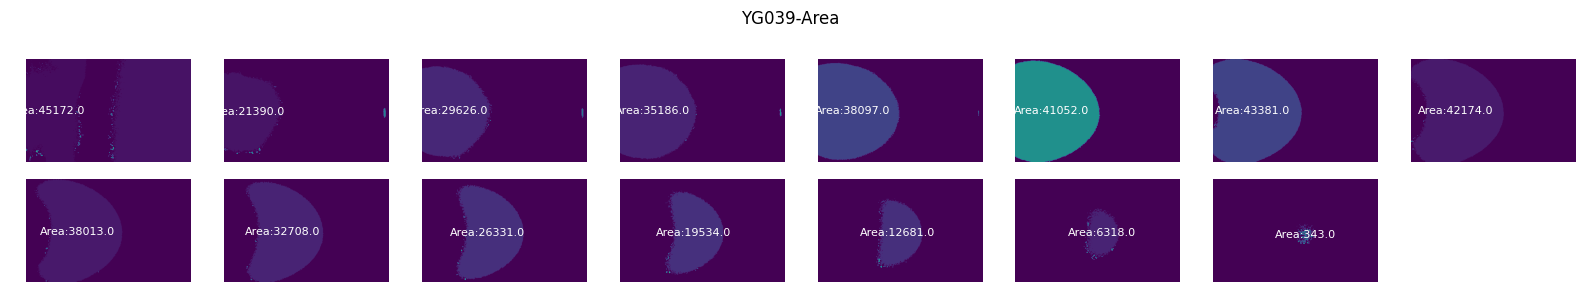

100%|██████████| 41/41 [00:09<00:00,  4.37it/s]


(15, 250, 400) (15, 2) (15,) (15,)


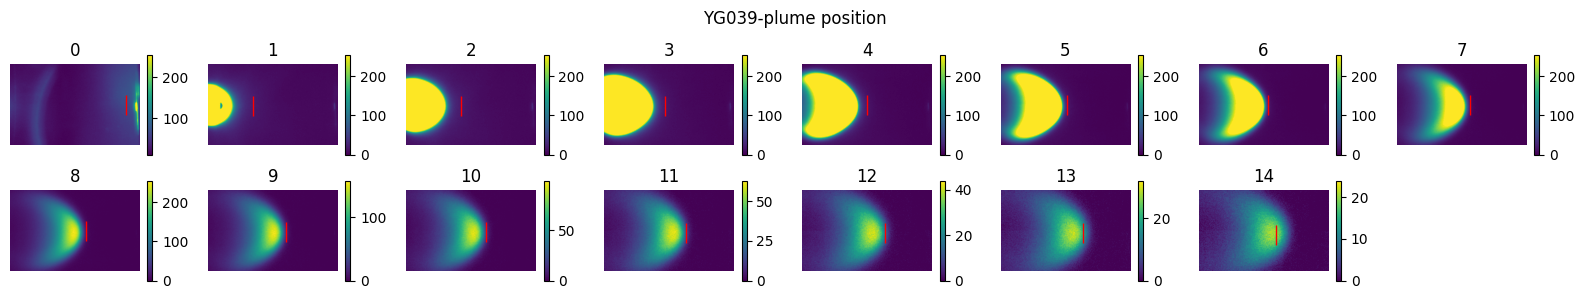

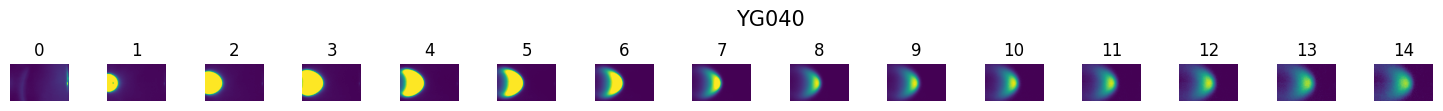

100%|██████████| 41/41 [00:10<00:00,  3.80it/s]


(15, 250, 400) (15,) (15, 2) (15, 250, 400)


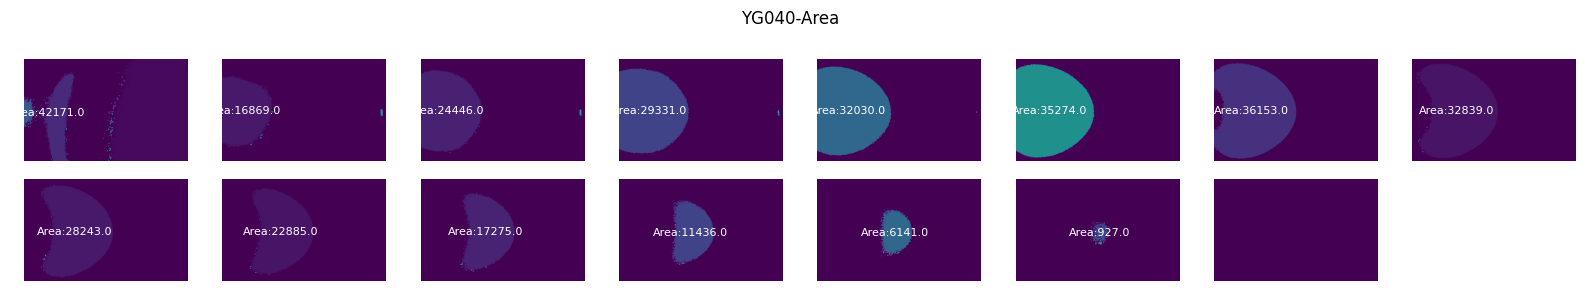

100%|██████████| 41/41 [00:08<00:00,  4.60it/s]


(15, 250, 400) (15, 2) (15,) (15,)


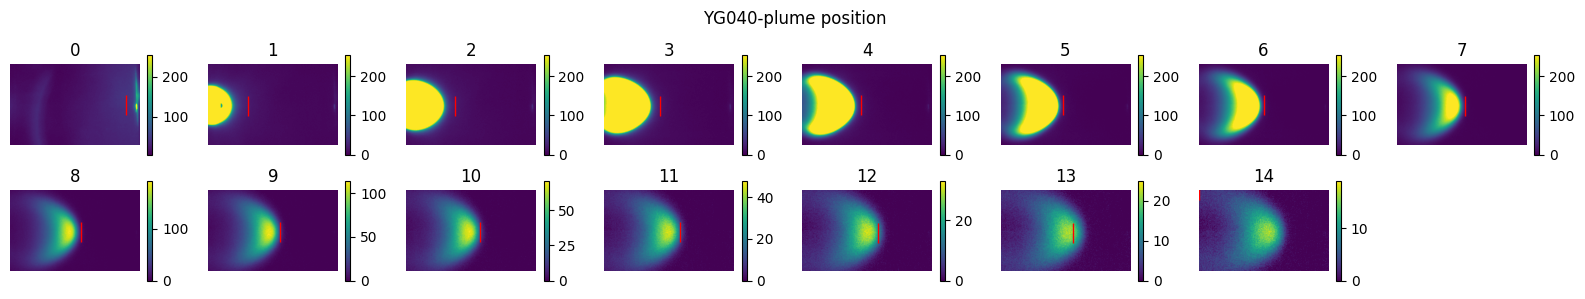

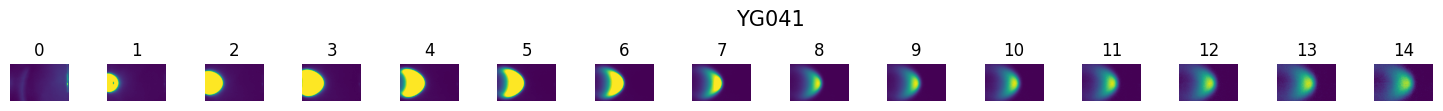

100%|██████████| 41/41 [00:10<00:00,  3.75it/s]


(15, 250, 400) (15,) (15, 2) (15, 250, 400)


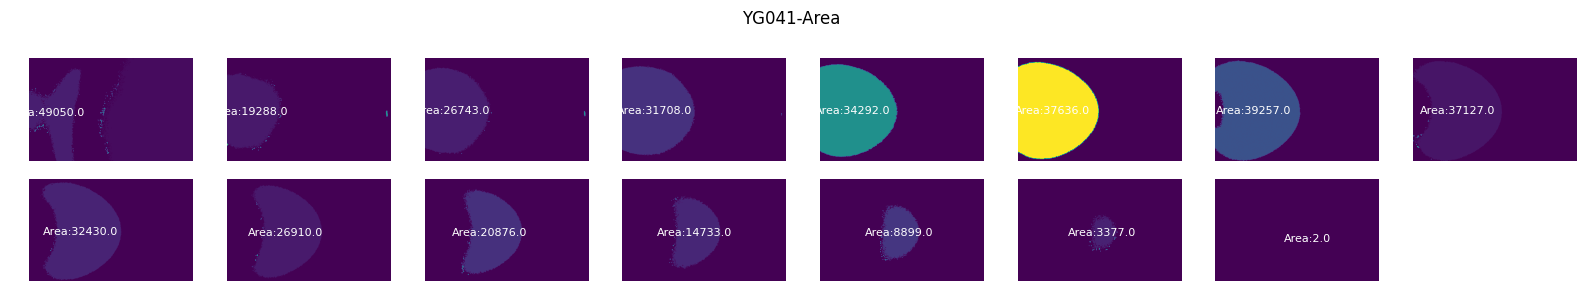

100%|██████████| 41/41 [00:08<00:00,  4.72it/s]


(15, 250, 400) (15, 2) (15,) (15,)


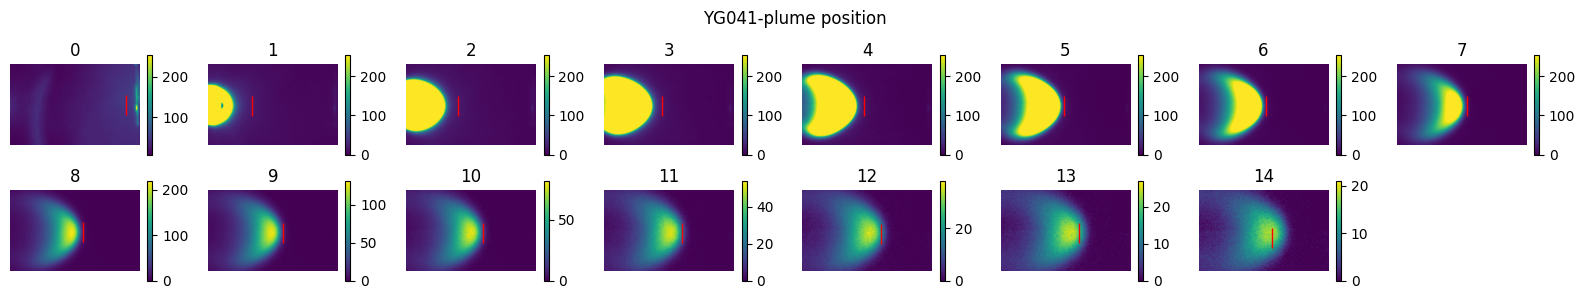

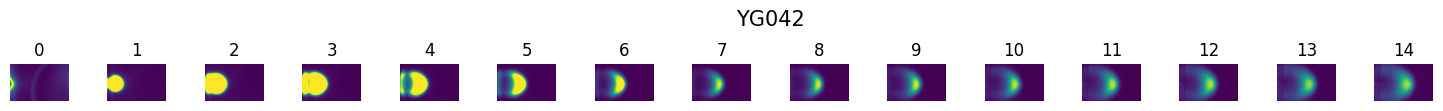

100%|██████████| 36/36 [00:10<00:00,  3.34it/s]


(15, 250, 400) (15,) (15, 2) (15, 250, 400)


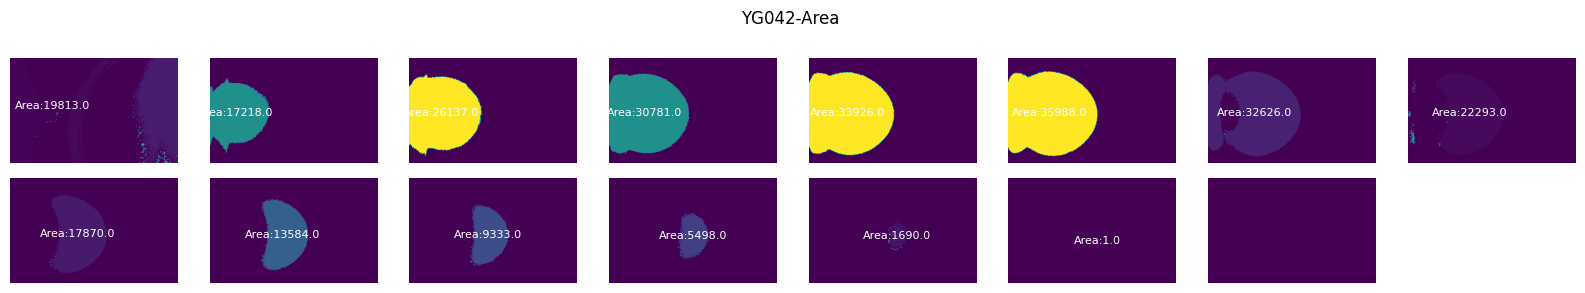

100%|██████████| 36/36 [00:07<00:00,  5.11it/s]


(15, 250, 400) (15, 2) (15,) (15,)


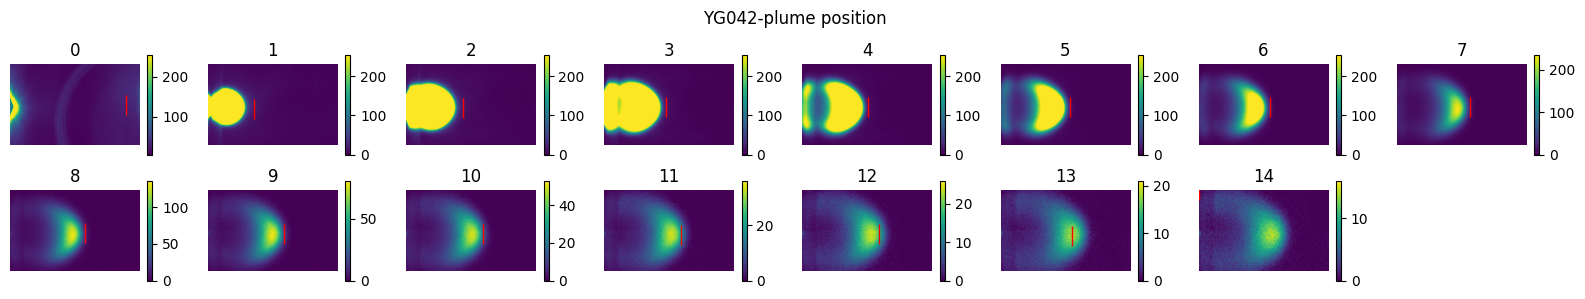

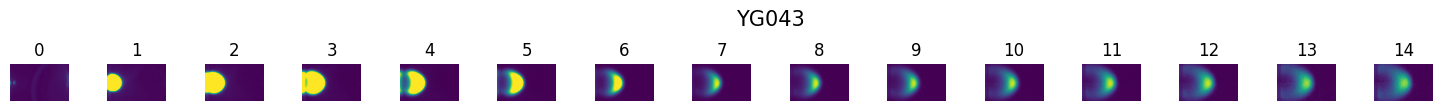

100%|██████████| 36/36 [00:10<00:00,  3.36it/s]


(15, 250, 400) (15,) (15, 2) (15, 250, 400)


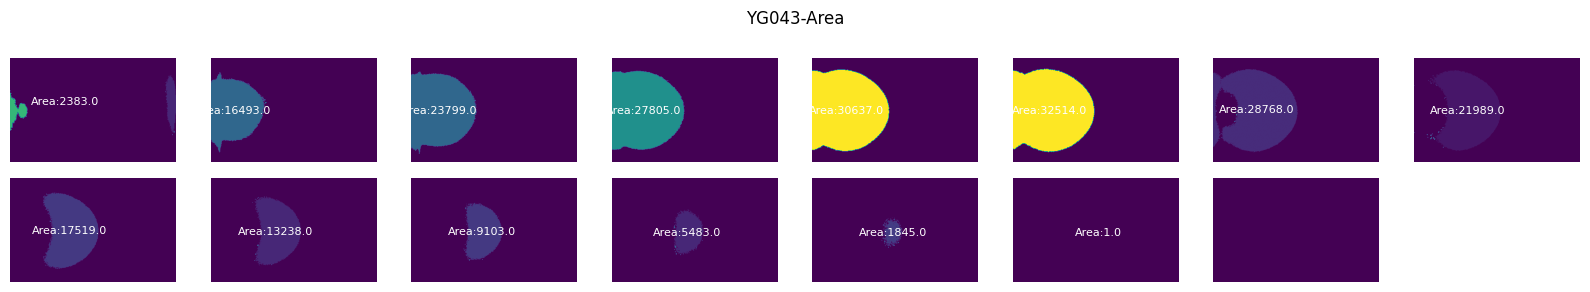

100%|██████████| 36/36 [00:06<00:00,  5.34it/s]


(15, 250, 400) (15, 2) (15,) (15,)


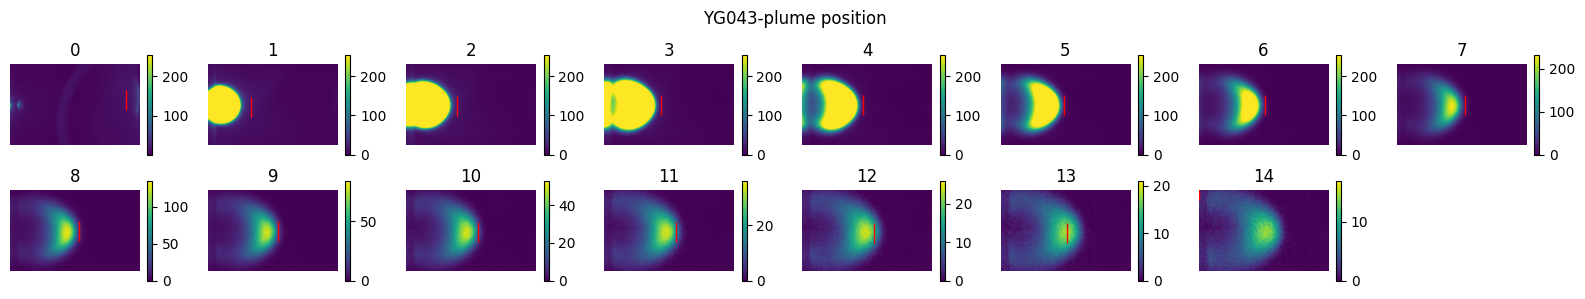

In [20]:
ds_files = glob.glob('../../datasets/YG*h5')

df_list = []
for file, loading_name in ds_files_dict.items():
    ds_name = file.split('\\')[-1].split('_')[0]
    plume_ds = plume_dataset(file_path=file, group_name='PLD_Plumes')
    plumes = plume_ds.load_plumes(loading_name)
    # show_images(plumes[3][labels], labels=labels, img_per_row=16, img_height=1, title=ds_name)
    # plt.show()

    df = analyze_function(P, V, plumes, threshold, index, viz_index, ds_name, align_parms={'align':False, 'coords':None, 'coords_standard':None})
    df['Growth'] = ds_name
    df_list.append(df)

In [21]:
df_all = pd.concat(df_list, axis=0)
df_all

Distance  Velocity  Area Growth
plume_index time_index                                 
0           0               -125       0.0   0.0  YG028
            1               -125       0.0   0.0  YG028
            2               -125       0.0   0.0  YG028
            3               -125       0.0   0.0  YG028
            4               -125       0.0   0.0  YG028
...                          ...       ...   ...    ...
35          251              235       0.0   0.0  YG043
            252              235       0.0   0.0  YG043
            253              235       0.0   0.0  YG043
            254              235       0.0   0.0  YG043
            255              235       0.0   0.0  YG043

[120320 rows x 4 columns]

In [22]:
df_all.to_csv('../../datasets/PlumeSRO_df.csv', sep='\t')

## YG028, 029, 030

In [26]:
conditions = ['YG028', 'YG029', 'YG030']
df_plot = df_all[df_all['Growth'].isin(conditions)]

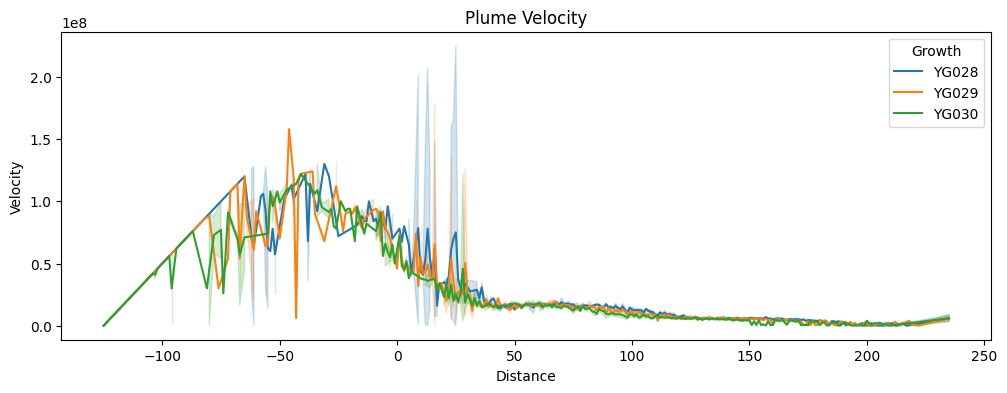

In [28]:
fig, ax = plt.subplots(figsize=(12, 4))
lineplot = sns.lineplot(x="Distance", y="Velocity", hue="Growth", data=df_plot)
plt.title('Plume Velocity')
plt.show()

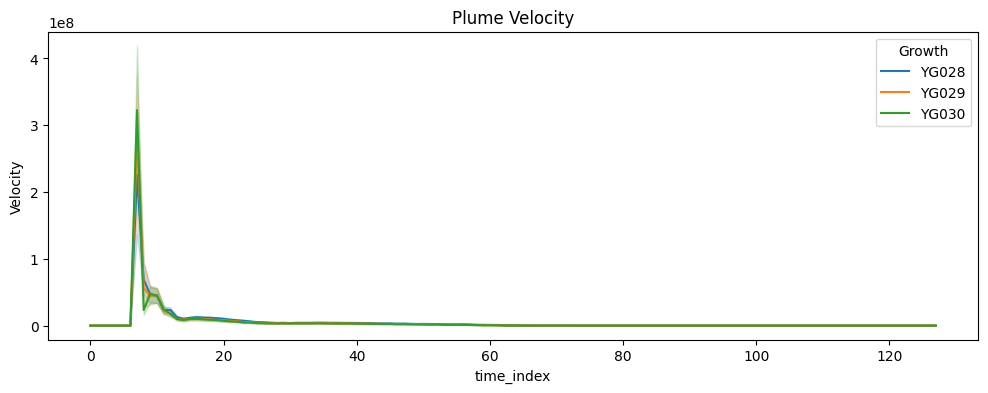

In [29]:
fig, ax = plt.subplots(figsize=(12, 4))
lineplot = sns.lineplot(x="time_index", y="Velocity", hue="Growth", data=df_plot)
plt.title('Plume Velocity')
plt.show()

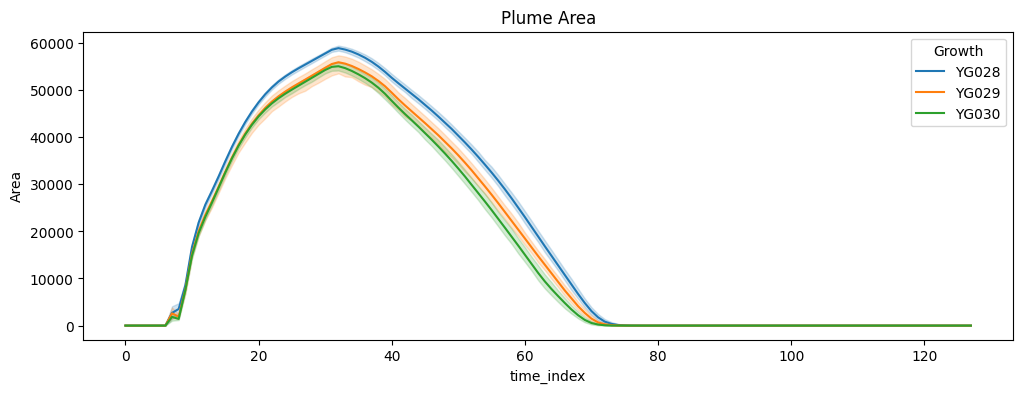

In [30]:
fig, ax = plt.subplots(figsize=(12, 4))
lineplot = sns.lineplot(x="time_index", y="Area", hue="Growth", data=df_plot)
plt.title('Plume Area')
plt.show()

## YG031, 032, 033, 034

In [36]:
conditions = ['YG031', 'YG032', 'YG033', 'YG034']
df_plot = df_all[df_all['Growth'].isin(conditions)]

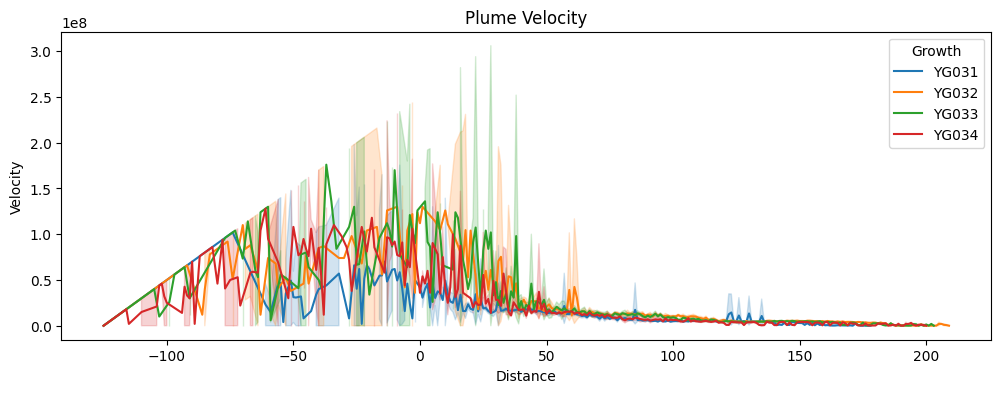

In [32]:
fig, ax = plt.subplots(figsize=(12, 4))
lineplot = sns.lineplot(x="Distance", y="Velocity", hue="Growth", data=df_plot)
plt.title('Plume Velocity')
plt.show()

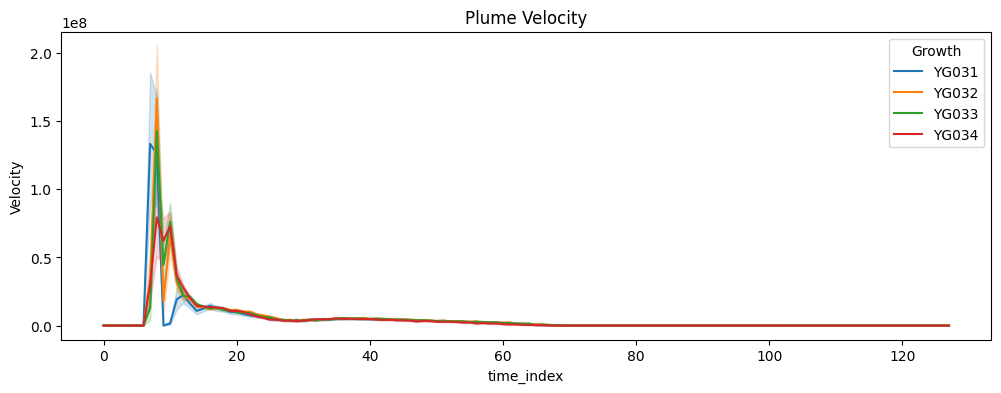

In [33]:
fig, ax = plt.subplots(figsize=(12, 4))
lineplot = sns.lineplot(x="time_index", y="Velocity", hue="Growth", data=df_plot)
plt.title('Plume Velocity')
plt.show()

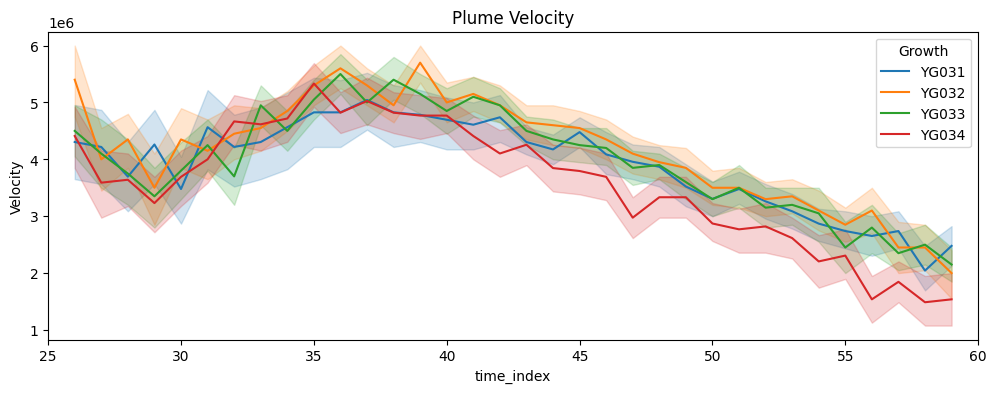

In [37]:
df_plot = df_plot[df_plot.index.get_level_values('time_index')>25]
df_plot = df_plot[df_plot.index.get_level_values('time_index')<60]

fig, ax = plt.subplots(figsize=(12, 4))
lineplot = sns.lineplot(x="time_index", y="Velocity", hue="Growth", data=df_plot)
plt.title('Plume Velocity')
plt.xlim(25, 60)
plt.show()

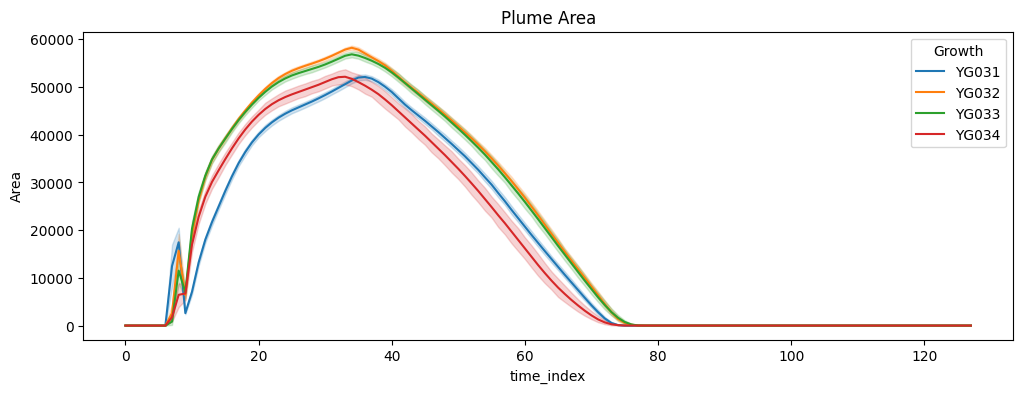

In [34]:
fig, ax = plt.subplots(figsize=(12, 4))
lineplot = sns.lineplot(x="time_index", y="Area", hue="Growth", data=df_plot)
plt.title('Plume Area')
plt.show()

In [ ]:
df_plot = df_all
fig, ax = plt.subplots(figsize=(12, 4))
lineplot = sns.lineplot(x="time_index", y="Velocity", hue="Fluence", data=df_plot)
plt.title('Plume Velocity')
plt.show()

df_plot = df_all
df_plot = df_plot[df_plot.index.get_level_values('time_index')>11]
df_plot = df_plot[df_plot.index.get_level_values('time_index')<25]
df_plot
fig, ax = plt.subplots(figsize=(12, 4))
lineplot = sns.lineplot(x="time_index", y="Velocity", hue="Fluence", data=df_plot)
plt.title('Plume Velocity')
plt.show()

### plume velocity

In [ ]:
conditions = ['2.25mj/cm^2_140mTorr', '1.75mj/cm^2_60mTorr', '1.25mj/cm^2_60mTorr', '2.25mj/cm^2_60mTorr', '1.75mj/cm^2_140mTorr']
df_plot = df_all[df_all['Growth Condition'].isin(conditions)]
fig, ax = plt.subplots(figsize=(12, 4))
lineplot = sns.lineplot(x="Distance", y="Velocity", hue="Growth Condition", data=df_plot)
plt.xlim(100, 230)
plt.title('Plume Velocity')
plt.show()

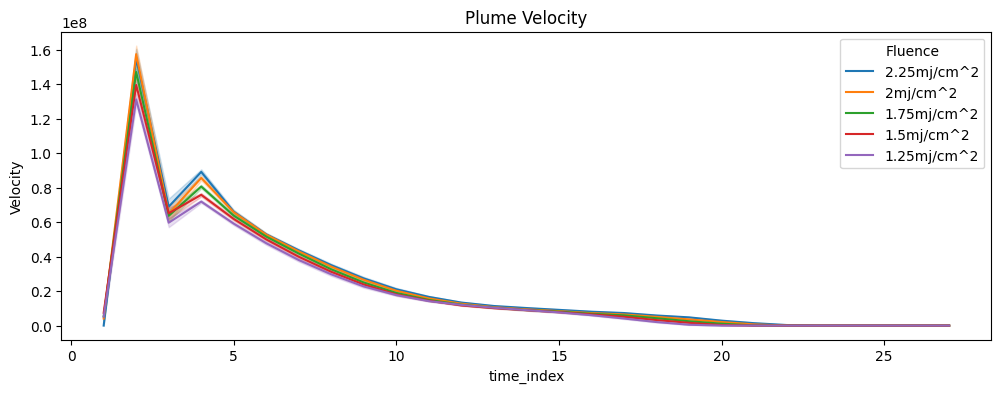

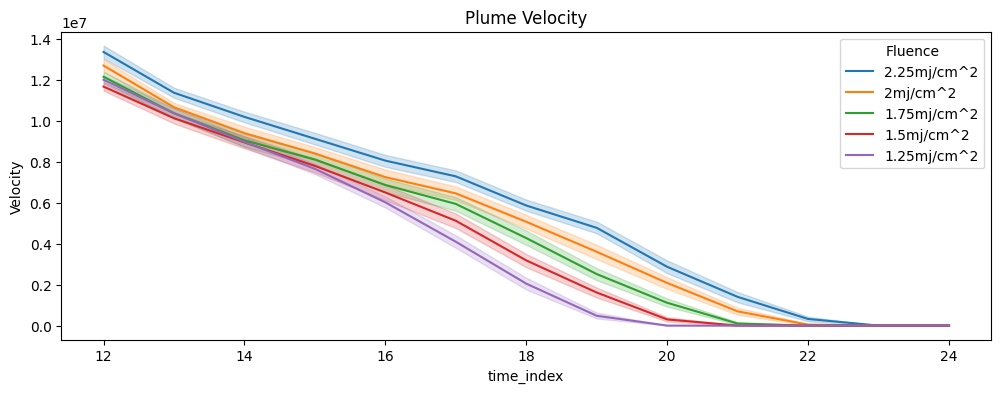

In [ ]:
df_plot = df_all
fig, ax = plt.subplots(figsize=(12, 4))
lineplot = sns.lineplot(x="time_index", y="Velocity", hue="Fluence", data=df_plot)
plt.title('Plume Velocity')
plt.show()

df_plot = df_all
df_plot = df_plot[df_plot.index.get_level_values('time_index')>11]
df_plot = df_plot[df_plot.index.get_level_values('time_index')<25]
df_plot
fig, ax = plt.subplots(figsize=(12, 4))
lineplot = sns.lineplot(x="time_index", y="Velocity", hue="Fluence", data=df_plot)
plt.title('Plume Velocity')
plt.show()

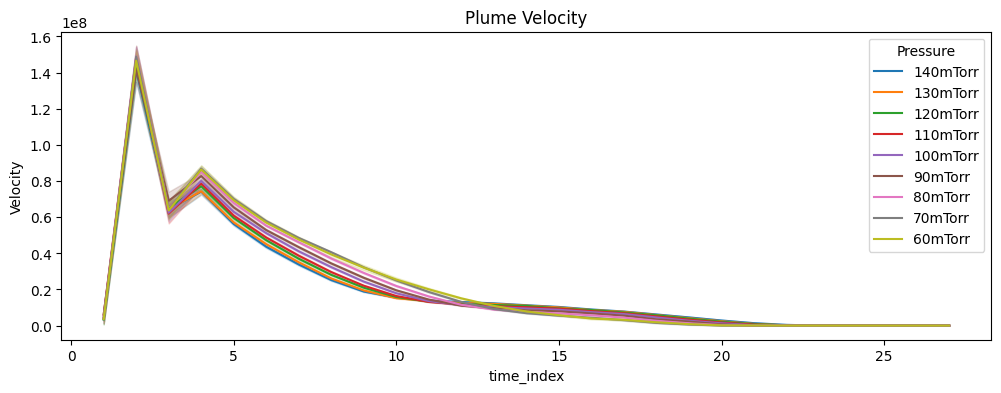

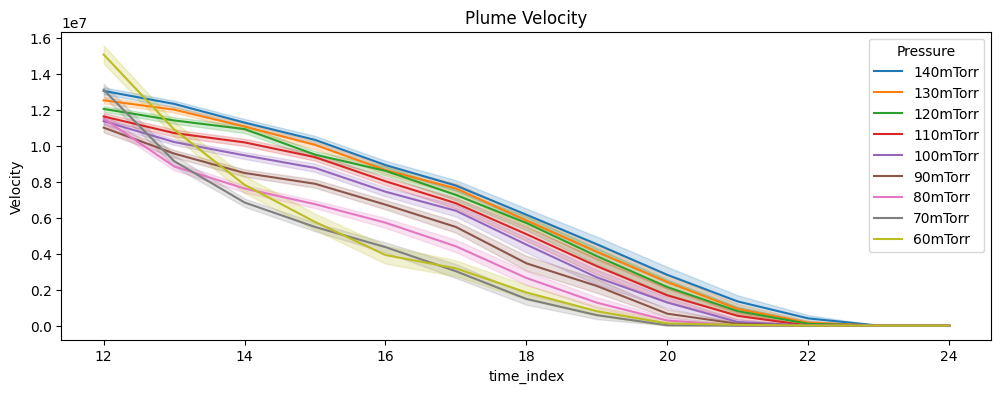

In [ ]:
df_plot = df_all
fig, ax = plt.subplots(figsize=(12, 4))
lineplot = sns.lineplot(x="time_index", y="Velocity", hue="Pressure", data=df_plot)
plt.title('Plume Velocity')
plt.show()

df_plot = df_all
df_plot = df_plot[df_plot.index.get_level_values('time_index')>11]
df_plot = df_plot[df_plot.index.get_level_values('time_index')<25]
df_plot
fig, ax = plt.subplots(figsize=(12, 4))
lineplot = sns.lineplot(x="time_index", y="Velocity", hue="Pressure", data=df_plot)
plt.title('Plume Velocity')
plt.show()

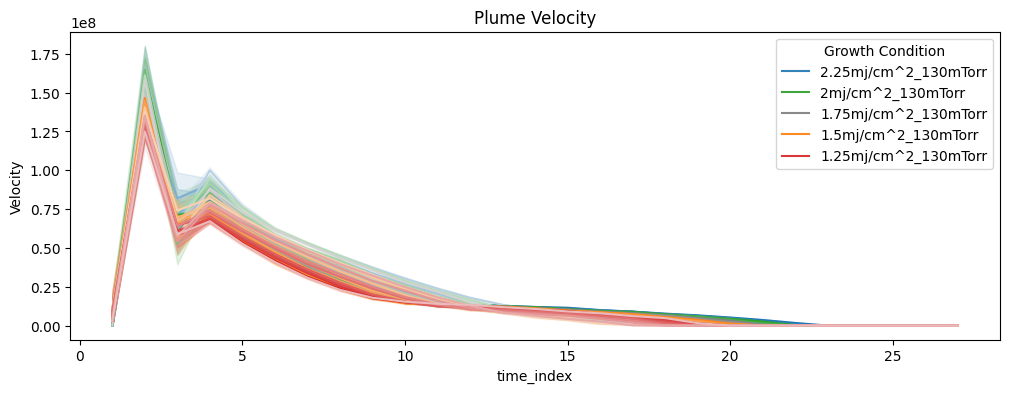

In [ ]:
df_plot = df_all

fig, ax = plt.subplots(figsize=(12, 4))
lineplot  = sns.lineplot(x="time_index", y="Velocity", hue="Growth Condition", data=df_plot, palette=all_colors)

handles, labels = lineplot.get_legend_handles_labels()
selected_handles = handles[1:46:9]  # Skipping the first handle which is the title
selected_labels = labels[1:46:9]  # Skipping the first label which is the title
plt.legend(selected_handles, selected_labels, title='Growth Condition')

plt.title('Plume Velocity')
plt.show()

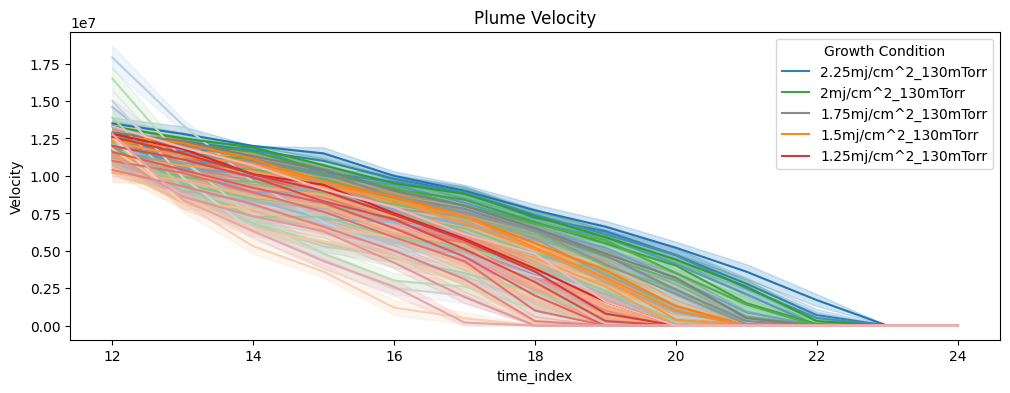

In [ ]:
df_plot = df_all
df_plot = df_plot[df_plot.index.get_level_values('time_index')>11]
df_plot = df_plot[df_plot.index.get_level_values('time_index')<25]
df_plot

fig, ax = plt.subplots(figsize=(12, 4))
lineplot  = sns.lineplot(x="time_index", y="Velocity", hue="Growth Condition", data=df_plot, palette=all_colors)

handles, labels = lineplot.get_legend_handles_labels()
selected_handles = handles[1:46:9]  # Skipping the first handle which is the title
selected_labels = labels[1:46:9]  # Skipping the first label which is the title
plt.legend(selected_handles, selected_labels, title='Growth Condition')

plt.title('Plume Velocity')
plt.show()

### plume area

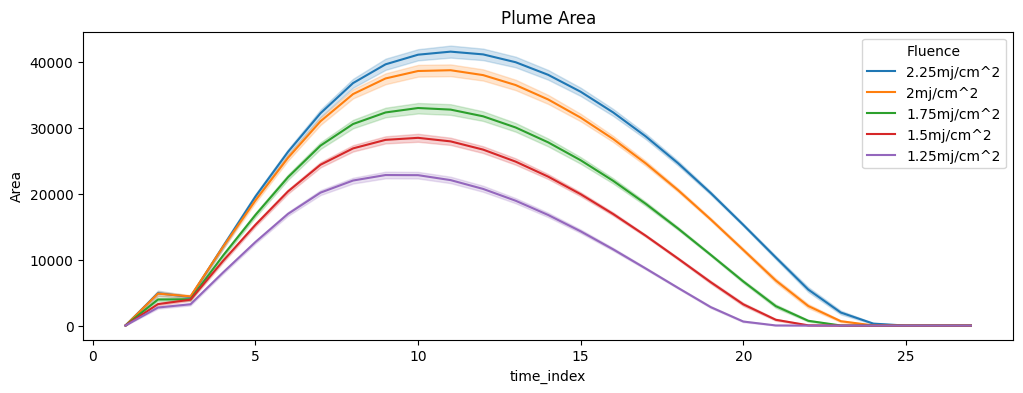

In [ ]:
df_plot = df_all
fig, ax = plt.subplots(figsize=(12, 4))
lineplot = sns.lineplot(x="time_index", y="Area", hue="Fluence", data=df_plot)
plt.title('Plume Area')
plt.show()

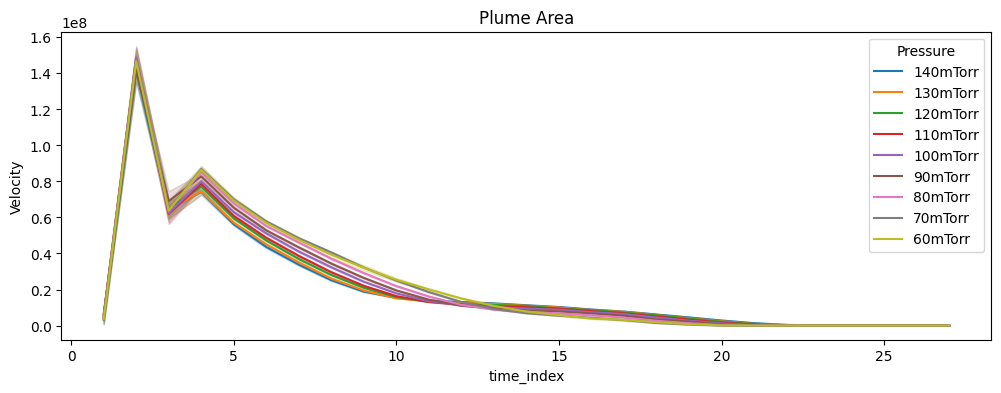

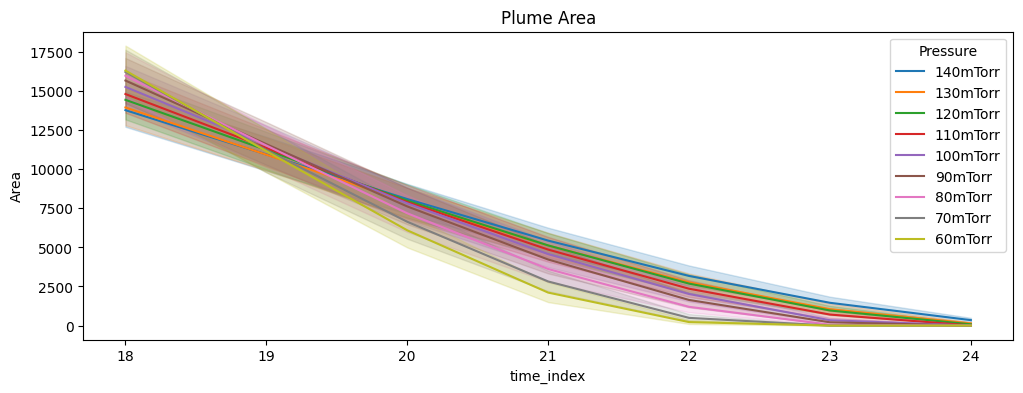

In [ ]:
df_plot = df_all
fig, ax = plt.subplots(figsize=(12, 4))
lineplot = sns.lineplot(x="time_index", y="Velocity", hue="Pressure", data=df_plot)
plt.title('Plume Area')
plt.show()

df_plot = df_all
df_plot = df_plot[df_plot.index.get_level_values('time_index')>17]
df_plot = df_plot[df_plot.index.get_level_values('time_index')<25]
df_plot
fig, ax = plt.subplots(figsize=(12, 4))
lineplot = sns.lineplot(x="time_index", y="Area", hue="Pressure", data=df_plot)
plt.title('Plume Area')
plt.show()

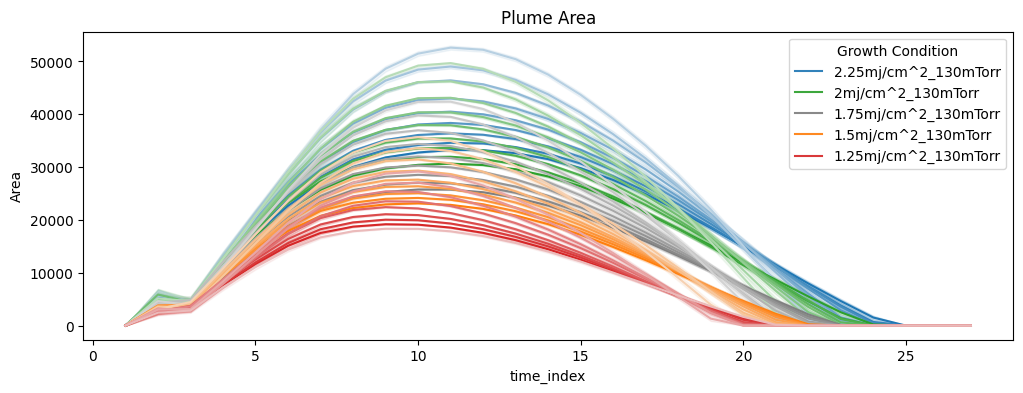

In [ ]:
df_plot = df_all

fig, ax = plt.subplots(figsize=(12, 4))
lineplot  = sns.lineplot(x="time_index", y="Area", hue="Growth Condition", data=df_plot, palette=all_colors)

handles, labels = lineplot.get_legend_handles_labels()
selected_handles = handles[1:46:9]  # Skipping the first handle which is the title
selected_labels = labels[1:46:9]  # Skipping the first label which is the title
plt.legend(selected_handles, selected_labels, title='Growth Condition')

plt.title('Plume Area')
plt.show()

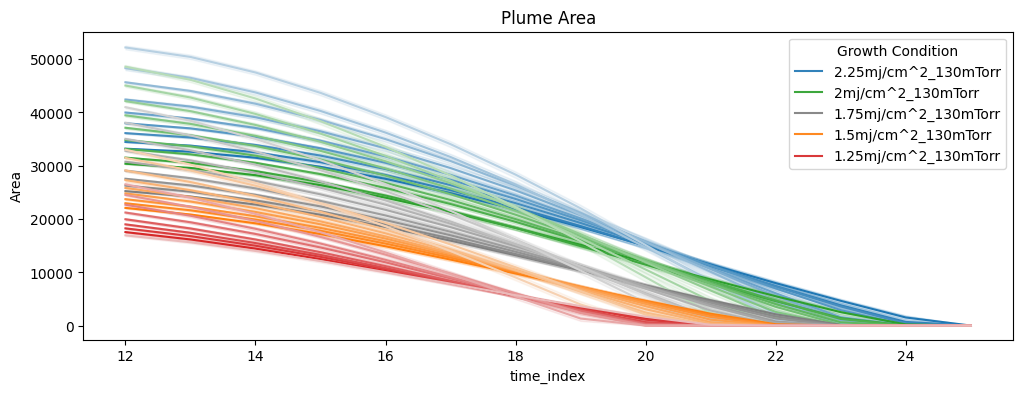

In [ ]:
df_plot = df_all
df_plot = df_plot[df_plot.index.get_level_values('time_index')>11]
df_plot = df_plot[df_plot.index.get_level_values('time_index')<26]
df_plot

fig, ax = plt.subplots(figsize=(12, 4))
lineplot  = sns.lineplot(x="time_index", y="Area", hue="Growth Condition", data=df_plot, palette=all_colors)

handles, labels = lineplot.get_legend_handles_labels()
selected_handles = handles[1:46:9]  # Skipping the first handle which is the title
selected_labels = labels[1:46:9]  # Skipping the first label which is the title
plt.legend(selected_handles, selected_labels, title='Growth Condition')

plt.title('Plume Area')
plt.show()